# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.index.names = ['StudentID']
student_data.head()

,Age,Tardies
StudentID,,
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


## Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

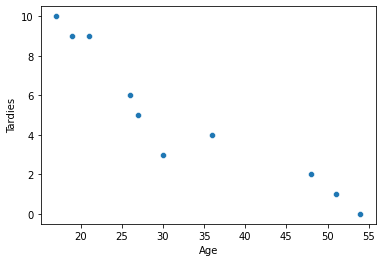

In [3]:
sns.scatterplot(data= student_data, x = "Age", y= "Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Parece que a mayor edad , menos veces se llega tarde. 

## Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
covariance_student = student_data.cov()
covariance_student

#existe una relación lineal inversa o negativa entre X e Y. Esto es, a mayores valores de X, 
#en promedio tenemos menores valores de Y y viceversa.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
correlation_student= student_data.corr()
correlation_student

#Un dato depende del otro de una manera muy fuerte, pero de forma negativa o inversa. 


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


## Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

##### Outcome = tardies .    Sabiendo la edad , calcular cuantas veces se estima que llegue tarde. 
##### Simple linear regression 

##### `TARDIES = m * AGE + `




In [8]:
lr = LinearRegression()

In [9]:
lr.fit(
    X = student_data[["Age"]],
    y = student_data[["Tardies"]]
)

LinearRegression()

In [10]:
optimal_m = lr.coef_
optimal_m 

array([[-0.24282077]])

In [11]:
optimal_n = lr.intercept_
optimal_n

array([12.88880336])

## Plot your regression model on your scatter plot.

In [12]:
student_data["prediction"] = (student_data[["Age"]] * optimal_m + optimal_n).round(2)
student_data.head()

,Age,Tardies,prediction
StudentID,,,
0,17,10,8.76
1,51,1,0.50
2,27,5,6.33
3,21,9,7.79
4,36,4,4.15


In [13]:
student_data["error_pred"]= (student_data.prediction - student_data.Tardies).abs()
student_data.head()

,Age,Tardies,prediction,error_pred
StudentID,,,,
0,17,10,8.76,1.24
1,51,1,0.50,0.50
2,27,5,6.33,1.33
3,21,9,7.79,1.21
4,36,4,4.15,0.15


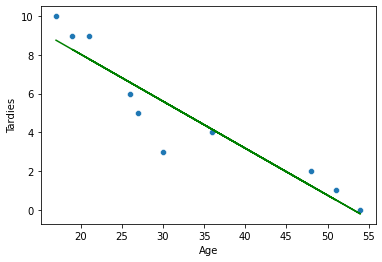

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])

plt.plot(student_data.Age, student_data.prediction, color='g', label='better')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# La edad parece ser un buen indicativo para predecir la cantidad de veces que se llega tarde, como ya preveiamos
# al calcular la correlacción .



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [45]:
data_v = pd.read_csv("vehicles.csv")
data_v.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

### Calculate the correlations between each of these variables and the outcome. Which variable do you think will  be the most important in determining CO2 emissions? Which provides the least amount of helpful information for  determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

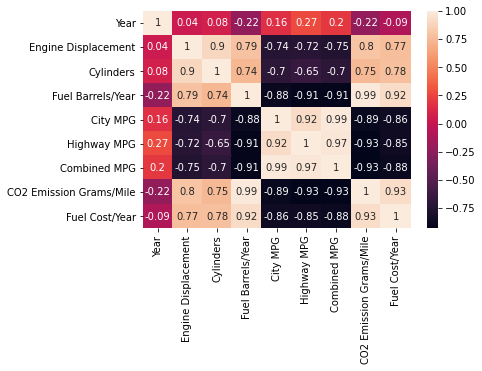

In [46]:
correlation_matrix = data_v.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

## La que menos info nos dará es YEAR ,   el resto nos darán buena info porque están cercanos al 1 , 
#aun que sea negativo.

In [48]:
data_v["Cylinders"].unique()

array([ 4.,  6.,  5.,  8., 12., 10.,  2.,  3., 16.])

In [49]:
list(data_v.columns.values)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year']

### Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Multiple linear regression

In [54]:

data_v2 = data_v.rename(columns = {'Fuel Barrels/Year': 'Fuel_Barrels', 'Combined MPG': 'Combined_MPG', 'Fuel Cost/Year':'Fuel_Cost', 'CO2 Emission Grams/Mile':'CO2'})
data_v2.head()



,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel_Barrels,City MPG,Highway MPG,Combined_MPG,CO2,Fuel_Cost
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [56]:
result = smf.ols('CO2 ~ Cylinders + Fuel_Barrels + Fuel_Cost + Combined_MPG', data = data_v2).fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.470e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:44:21   Log-Likelihood:            -1.5226e+05
No. Observations:               35952   AIC:                         3.045e+05
Df Residuals:                   35947   BIC:                         3.046e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders        1.0448      0.080     12.993      0.000       0.887       1.202
Fuel_Barrels    19.6271      0.060    329.809      0.000      19.510      19.744
Fuel_Cost        0.0294      0.000     61.102      0.000       0.028       0.030
Combined_MPG    -3.1666      0.043    -73.810      0.000      -3.251      -3.082
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

- Intentaria porbar si hay sinergias, pero no creo que el R^2 aumento mucho mas... 

- Obtenemos un R^2  muy significativo, porque es muy cercano al 1. 
- Sobre las diferentes variables podemos decir que todas tienen un P valor de 0, por lo que no podemos excluir niguna de ellas. todas son importantes.

- Si analizamos podemos decir que por cada Cilindro que sumas , tu contmainacion de CO2 sube 1.0448 
- El unico con relaccion inverso es MPG , que a mayor MPG menor CO2 . 



## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [24]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [25]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [26]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [27]:
# Your response here. 